In [27]:
from PoE_GPFlow import Generalised_PoE
m = Generalised_PoE()

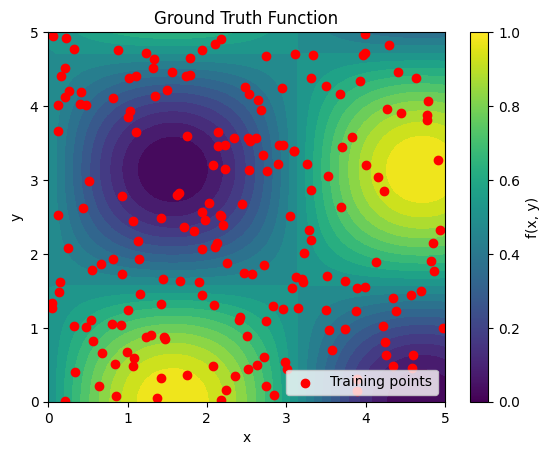

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true function
def f(x, y):
    return np.sin(x) * np.cos(y)

# Generate training data
np.random.seed(2)
n_train = 200
x_train = np.random.uniform(0, 5, size=(n_train,))
y_train = np.random.uniform(0, 5, size=(n_train,))
X_train = np.vstack((x_train, y_train)).T
sigma = 0.1
z_train = f(x_train, y_train) + sigma * np.random.randn(n_train)

# Generate test grid
x_lin = np.linspace(0, 5, 50)
y_lin = np.linspace(0, 5, 50)
X1, X2 = np.meshgrid(x_lin, y_lin)
X_test = np.vstack([X1.ravel(), X2.ravel()]).T

Z_true = f(X_test[:, 0], X_test[:, 1])

plt.contourf(X1, X2, Z_true.reshape(X1.shape), levels=20, cmap="viridis")
plt.scatter(x_train, y_train, c='red', label='Training points')
plt.colorbar(label='f(x, y)')
plt.legend()
plt.title("Ground Truth Function")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [29]:
m.train(X=X_train, Y=np.vstack(z_train), no_experts=3, allow_seperate_hyperparms=False)

Optimised hyperparameters: [1.66323412 1.71999007 0.00940352]


In [30]:
mean, var, beta = m.predict(X_test)

/tmp/ipykernel_2620/490328763.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


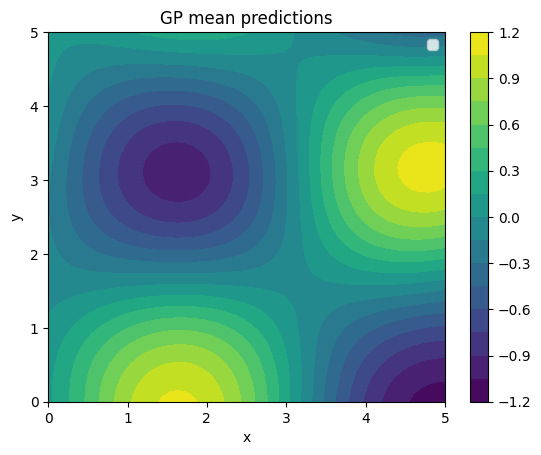

In [31]:
plt.contourf(X1, X2, mean.reshape(X1.shape), levels=20, cmap="viridis")
plt.colorbar()
plt.legend()
plt.title("GP mean predictions")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

/tmp/ipykernel_2620/4071489468.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


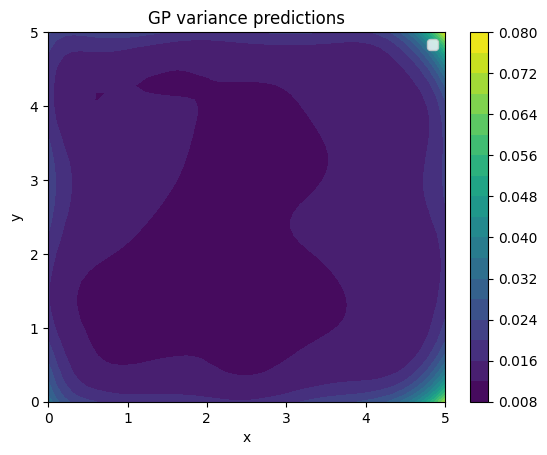

In [32]:
plt.contourf(X1, X2, var.reshape(X1.shape), levels=20, cmap="viridis")
plt.colorbar()
plt.legend()
plt.title("GP variance predictions")
plt.xlabel("x")
plt.ylabel("y")
plt.show()